# Modelado y Optimización de Mejores Modelos.
## dataset: default of credit card clients

# Importa Librerias

In [1]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from matplotlib import pylab
from pylab import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
    
#cross validation
from sklearn.model_selection import train_test_split

#print(digits.data)

%matplotlib inline



In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1) # dataset original
credit_bins = pd.read_csv('credit_bins.csv', header =0)# dataset con divisiones en las variables continuas
credit2 = pd.read_csv('credit_bins_total.csv', header =0) # dataset con todas las variables_ continuas y nuevas categóricas.
compIV =pd.read_csv('compIV.csv', header =0) ### importación de los valores Information value para los atributos continuos.

default_mapping = {.0 : 'false', .1 : 'true'}

credit_bins["default_payment_next_month"]=credit_bins["default_payment_next_month"].map(default_mapping)

credit_bins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
default_payment_next_month    30000 non-null object
LIMIT_BAL_bins                30000 non-null object
LIMIT_AGE_bins                30000 non-null object
BILL_ATM1_bins                30000 non-null object
BILL_ATM2_bins                30000 non-null object
BILL_ATM3_bins                30000 non-null object
BILL_ATM4_bins                30000 non-null object
BILL_ATM

In [3]:
### Durante el análisis exploratorio anterior se utilizan los bins de 5 divisiones que optimizan el Information value.
print(compIV)

   Variable_10div IV_10div Variable_5div IV_5div Variable_3div IV_3div
0           PAY_0   0,8772         PAY_0  0,8772         PAY_0  0,8772
1           PAY_2   0,5488         PAY_2  0,5488         PAY_2  0,5488
2           PAY_3    0,416         PAY_3   0,416         PAY_3   0,416
3           PAY_4   0,3673         PAY_4  0,3673         PAY_4  0,3673
4           PAY_5   0,3402         PAY_5  0,3402         PAY_5  0,3402
5           PAY_6   0,2933         PAY_6  0,2933         PAY_6  0,2933
6       LIMIT_BAL   0,1752     LIMIT_BAL  0,1688     LIMIT_BAL   0,147
7        PAY_AMT1   0,1624      PAY_AMT1  0,1555      PAY_AMT1  0,1247
8        PAY_AMT2   0,1461      PAY_AMT2  0,1366      PAY_AMT2  0,1111
9        PAY_AMT3   0,1242      PAY_AMT3   0,117      PAY_AMT3  0,0934
10       PAY_AMT4   0,0909      PAY_AMT4  0,0845      PAY_AMT4  0,0806
11       PAY_AMT6   0,0906      PAY_AMT6  0,0843      PAY_AMT6  0,0785
12       PAY_AMT5   0,0816      PAY_AMT5  0,0726      PAY_AMT5  0,0695
13    

In [4]:
#Valores y cantidades de cada bin
print(credit_bins['SEX'].value_counts())
print(credit_bins['EDUCATION'].value_counts())
print(credit_bins['MARRIAGE'].value_counts())
print(credit_bins['PAY_0'].value_counts())
print(credit_bins['PAY_2'].value_counts())
print(credit_bins['PAY_3'].value_counts())
print(credit_bins['PAY_4'].value_counts())
print(credit_bins['PAY_5'].value_counts())
print(credit_bins['PAY_6'].value_counts())
print(credit_bins['LIMIT_BAL_bins'].value_counts())
print(credit_bins['LIMIT_AGE_bins'].value_counts())
print(credit_bins['BILL_ATM1_bins'].value_counts())
print(credit_bins['BILL_ATM2_bins'].value_counts())
print(credit_bins['BILL_ATM3_bins'].value_counts())
print(credit_bins['BILL_ATM4_bins'].value_counts())
print(credit_bins['BILL_ATM5_bins'].value_counts())
print(credit_bins['BILL_ATM6_bins'].value_counts())

print(credit_bins['PAY_AMT1_bins'].value_counts())
print(credit_bins['PAY_AMT2_bins'].value_counts())
print(credit_bins['PAY_AMT3_bins'].value_counts())
print(credit_bins['PAY_AMT4_bins'].value_counts())
print(credit_bins['PAY_AMT5_bins'].value_counts())
print(credit_bins['PAY_AMT6_bins'].value_counts())

print(credit_bins['default_payment_next_month'].value_counts())


female    18112
male      11888
Name: SEX, dtype: int64
university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64
single     15964
married    13659
divorce      323
others        54
Name: MARRIAGE, dtype: int64
.0     14737
.-1     5686
.1      3688
.-2     2759
.2      2667
.3       322
.4        76
.5        26
.8        19
.6        11
.7         9
Name: PAY_0, dtype: int64
.0     15730
.-1     6050
.2      3927
.-2     3782
.3       326
.4        99
.1        28
.5        25
.7        20
.6        12
.8         1
Name: PAY_2, dtype: int64
.0     15764
.-1     5938
.-2     4085
.2      3819
.3       240
.4        76
.7        27
.6        23
.5        21
.1         4
.8         3
Name: PAY_3, dtype: int64
.0     16455
.-1     5687
.-2     4348
.2      3159
.3       180
.4        69
.7        58
.5        35
.6         5
.8         2
.1         2
Name: PAY_4, dtype: int64
.0     16947
.-1     5539
.-2     4546
.2

In [5]:
#Mapeando a cada variable categorica, la variable secuencial correcta, iniciando en 1.

size_mapping = {'male': 0,'female': 1}

inv_size_mapping = {v: k for k, v in size_mapping.items()}


credit_mapping ={'.-2' : 1 , '.-1' : 2 ,'.0' : 3,'.1' :4,'.2' : 5,'.3' : 6,'.4' : 7,'.5' : 8 ,'.6' : 9,'.7' : 10,'.8' : 11 }


limit_bal_mapping={'10000_50000' : 1 , '50001_100000' : 2 ,'100001_180000' : 3,'180001_270000' :4,'270001_1000000':5 }


limit_age_mapping={'21_27' : 1 , '28_30' : 2 ,'31_37' : 3,'38_43' :4,'44_79':5 }


limit_BILL_ATM1={'-165580_1892' : 1 , '1893_13468' : 2 ,'13469_37042' : 3,'37043_83415' :4,'83416_964511':5 }
limit_BILL_ATM2={'-69777_1472' : 1 , '1473_12799' : 2 ,'12780_34773' : 3,'34774_80290' :4,'80291_983931':5 }
limit_BILL_ATM3={'-157264_1187' : 1 , '1188_12193' : 2 ,'12194_31401' : 3,'31402_76777' :4,'76778_1664089':5 }
limit_BILL_ATM4={'-170000_988' : 1 , '989_11145' : 2 ,'11146_28604' : 3,'28605_70579' :4,'70580_891586':5 }
limit_BILL_ATM5={'-81334_763' : 1 , '764_9808' : 2 ,'9809_26690' : 3,'26691_65820' :4,'65821_927171':5 }
limit_BILL_ATM6={'-339906_476' : 1 , '477_8769' : 2 ,'8770_25506' : 3,'25507_63150' :4,'63151_961664':5 }

limit_PAY_AMT1={'0_316' : 1 , '317_1724' : 2 ,'1725_3000' : 3,'3001_6192' :4,'6193_873552':5 }
limit_PAY_AMT2={'0_268' : 1 , '269_1600' : 2 ,'1601_3000' : 3,'3001_6000' :4,'6001_1684259':5 }
limit_PAY_AMT3={'0_2' : 1 , '3_1206' : 2 ,'1207_2500' : 3,'2501_5283' :4,'5284_896040':5 }
limit_PAY_AMT4={'0_1000' : 1 , '1001_2100' : 2 ,'2101_5000' : 3,'5001_621000' :4}
limit_PAY_AMT5={'0_1000' : 1 , '1001_2123' : 2 ,'2124_5000' : 3,'5001_426529' :4 }
limit_PAY_AMT6={'0_1000' : 1 , '1001_2100' : 2 ,'2101_5000' : 3,'5001_528666' :4 }


default_mapping = {'true': 1,'false': 0}


credit_bins["SEX"]=credit_bins['SEX'].map(size_mapping)

credit_bins["default_payment_next_month"]=credit_bins["default_payment_next_month"].map(default_mapping)
credit_bins["LIMIT_BAL_bins"]=credit_bins["LIMIT_BAL_bins"].map(limit_bal_mapping)
credit_bins["LIMIT_AGE_bins"]=credit_bins["LIMIT_AGE_bins"].map(limit_age_mapping)

credit_bins["PAY_0"]=credit_bins["PAY_0"].map(credit_mapping)
credit_bins["PAY_2"]=credit_bins["PAY_2"].map(credit_mapping)
credit_bins["PAY_3"]=credit_bins["PAY_3"].map(credit_mapping)
credit_bins["PAY_4"]=credit_bins["PAY_4"].map(credit_mapping)
credit_bins["PAY_5"]=credit_bins["PAY_5"].map(credit_mapping)
credit_bins["PAY_6"]=credit_bins["PAY_6"].map(credit_mapping)

credit_bins["BILL_ATM1_bins"]=credit_bins["BILL_ATM1_bins"].map(limit_BILL_ATM1)
credit_bins["BILL_ATM2_bins"]=credit_bins["BILL_ATM2_bins"].map(limit_BILL_ATM2)
credit_bins["BILL_ATM3_bins"]=credit_bins["BILL_ATM3_bins"].map(limit_BILL_ATM3)
credit_bins["BILL_ATM4_bins"]=credit_bins["BILL_ATM4_bins"].map(limit_BILL_ATM4)
credit_bins["BILL_ATM5_bins"]=credit_bins["BILL_ATM5_bins"].map(limit_BILL_ATM5)
credit_bins["BILL_ATM6_bins"]=credit_bins["BILL_ATM6_bins"].map(limit_BILL_ATM6)

credit_bins["PAY_AMT1_bins"]=credit_bins["PAY_AMT1_bins"].map(limit_PAY_AMT1)
credit_bins["PAY_AMT2_bins"]=credit_bins["PAY_AMT2_bins"].map(limit_PAY_AMT2)
credit_bins["PAY_AMT3_bins"]=credit_bins["PAY_AMT3_bins"].map(limit_PAY_AMT3)
credit_bins["PAY_AMT4_bins"]=credit_bins["PAY_AMT4_bins"].map(limit_PAY_AMT4)
credit_bins["PAY_AMT5_bins"]=credit_bins["PAY_AMT5_bins"].map(limit_PAY_AMT5)
credit_bins["PAY_AMT6_bins"]=credit_bins["PAY_AMT6_bins"].map(limit_PAY_AMT6)



   

print(credit_bins['SEX'].value_counts())
print(credit_bins['EDUCATION'].value_counts())
print(credit_bins['MARRIAGE'].value_counts())
print(credit_bins['PAY_0'].value_counts())
print(credit_bins['PAY_2'].value_counts())
print(credit_bins['PAY_3'].value_counts())
print(credit_bins['PAY_4'].value_counts())
print(credit_bins['PAY_5'].value_counts())
print(credit_bins['PAY_6'].value_counts())
print(credit_bins['LIMIT_BAL_bins'].value_counts())
print(credit_bins['LIMIT_AGE_bins'].value_counts())

print(credit_bins['BILL_ATM1_bins'].value_counts())
print(credit_bins['BILL_ATM2_bins'].value_counts())
print(credit_bins['BILL_ATM3_bins'].value_counts())
print(credit_bins['BILL_ATM4_bins'].value_counts())
print(credit_bins['BILL_ATM5_bins'].value_counts())
print(credit_bins['BILL_ATM6_bins'].value_counts())

print(credit_bins['PAY_AMT1_bins'].value_counts())
print(credit_bins['PAY_AMT2_bins'].value_counts())
print(credit_bins['PAY_AMT3_bins'].value_counts())
print(credit_bins['PAY_AMT4_bins'].value_counts())
print(credit_bins['PAY_AMT5_bins'].value_counts())
print(credit_bins['PAY_AMT6_bins'].value_counts())

print(credit_bins['default_payment_next_month'].value_counts())


1    18112
0    11888
Name: SEX, dtype: int64
university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64
single     15964
married    13659
divorce      323
others        54
Name: MARRIAGE, dtype: int64
3     14737
2      5686
4      3688
1      2759
5      2667
6       322
7        76
8        26
11       19
9        11
10        9
Name: PAY_0, dtype: int64
3     15730
2      6050
5      3927
1      3782
6       326
7        99
4        28
8        25
10       20
9        12
11        1
Name: PAY_2, dtype: int64
3     15764
2      5938
1      4085
5      3819
6       240
7        76
10       27
9        23
8        21
4         4
11        3
Name: PAY_3, dtype: int64
3     16455
2      5687
1      4348
5      3159
6       180
7        69
10       58
8        35
9         5
11        2
4         2
Name: PAY_4, dtype: int64
3     16947
2      5539
1      4546
5      2626
6       178
7        84
10       58
8        17

In [6]:
# Variables categoricas education y sex en hot shot encoding.

dummies=pd.get_dummies(credit_bins[['EDUCATION', 'MARRIAGE']],drop_first=True)

print(dummies)

result = pd.concat([credit_bins, dummies], axis=1)
                 
print(result)


       EDUCATION_high school  EDUCATION_others  EDUCATION_university  \
0                          0                 0                     1   
1                          0                 0                     1   
2                          0                 0                     1   
3                          0                 0                     1   
4                          0                 0                     1   
...                      ...               ...                   ...   
29995                      1                 0                     0   
29996                      1                 0                     0   
29997                      0                 0                     1   
29998                      1                 0                     0   
29999                      0                 0                     1   

       MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  
0                     1                0                0  
1              

In [7]:
#features, se seleccionan las variables a utilizar.
#result = pd.concat([credit_bins, dummies], axis=1)
df1=result.iloc[:,1:2]
df2=result.iloc[:,4:10]
df3=result.iloc[:,11:13]
df4=result.iloc[:,13:25]
df5=result.iloc[:,25:40]
features = pd.concat([df1,df2,df3,df4,df5],axis=1)

#
depVar = credit_bins['default_payment_next_month']
print('Summary of feature sample')

features.info()





Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
SEX                      30000 non-null int64
PAY_0                    30000 non-null int64
PAY_2                    30000 non-null int64
PAY_3                    30000 non-null int64
PAY_4                    30000 non-null int64
PAY_5                    30000 non-null int64
PAY_6                    30000 non-null int64
LIMIT_BAL_bins           30000 non-null int64
LIMIT_AGE_bins           30000 non-null int64
BILL_ATM1_bins           30000 non-null int64
BILL_ATM2_bins           30000 non-null int64
BILL_ATM3_bins           30000 non-null int64
BILL_ATM4_bins           30000 non-null int64
BILL_ATM5_bins           30000 non-null int64
BILL_ATM6_bins           30000 non-null int64
PAY_AMT1_bins            30000 non-null int64
PAY_AMT2_bins            30000 non-null int64
PAY_AMT3_bins            30000 non-null int64
PAY_AMT4_bins            30000 non-nu

In [8]:
#Training Set (Feature Space: X Training)
X_train = (features[: 30000])


#Se establecen las variables y_train X_train para entrenar los modelos.


y_train = depVar[: 30000]



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

#We can also use the shape function to double check that the split was made as needed:

X_train.shape, X_test.shape

y_train.shape, y_test.shape

#print(X_train.head())
#print(X_test.head())

((22500,), (7500,))

In [10]:
##Modelos

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
dtree =DecisionTreeClassifier()
rfm=RandomForestClassifier()
svm=SVC(gamma='auto')
knn=KNeighborsClassifier()
nb=GaussianNB()
sgd=SGDClassifier()


rfm.fit(X_train,y_train)
svm.fit(X_train,y_train,)
dtree.fit(X_train,y_train)
knn.fit(X_train,y_train)
nb.fit(X_train,y_train)
sgd.fit(X_train,y_train)
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.model_selection import cross_val_score

#Then simply pass each trained model and the training sets to the function to obtain the training score. Here is an example from the Random Forest model:

print('rfm')
print(cross_val_score(rfm, X_train, y_train,cv=3))
print('svm')
print(cross_val_score(svm, X_train, y_train,cv=3))
print('dtree')
print(cross_val_score(dtree, X_train, y_train,cv=3))
print('knn')
print(cross_val_score(knn, X_train, y_train,cv=3))
print('nb')
print(cross_val_score(nb, X_train, y_train,cv=3))
print('sgd')
print(cross_val_score(sgd, X_train, y_train,cv=3))
print('lr')
print(cross_val_score(lr, X_train, y_train,cv=3))



rfm
[0.80255966 0.80333333 0.79317242]
svm
[0.82042394 0.81653333 0.81717562]
dtree
[0.72097054 0.73093333 0.72262968]
knn
[0.79109452 0.7952     0.79103881]
nb
[0.72950273 0.774      0.77090279]
sgd
[0.80575923 0.81226667 0.75636752]
lr


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.80535929 0.80733333 0.80730764]


In [12]:
#predictions = modelRF.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt


#Make Predictions
predictionsrfm = rfm.predict(X_test)
predRsquaredrfm = r2_score(y_test,predictionsrfm)
rmserfm = sqrt(mean_squared_error(y_test, predictionsrfm))
print('rfm R Squared: %.3f' % predRsquaredrfm)
print('rfm RMSE: %.3f' % rmserfm)

predictionssvm = svm.predict(X_test)
predRsquaredsvm = r2_score(y_test,predictionssvm)
rmsesvm = sqrt(mean_squared_error(y_test, predictionssvm))
print('svm R Squared: %.3f' % predRsquaredsvm)
print('svm RMSE: %.3f' % rmsesvm)


predictionsdtree = dtree.predict(X_test)
predRsquareddtree = r2_score(y_test,predictionsdtree)
rmsedtree = sqrt(mean_squared_error(y_test, predictionsdtree))
print('dtree. R Squared: %.3f' % predRsquareddtree)
print('dtree. RMSE: %.3f' % rmsedtree)

predictionsknn = knn.predict(X_test)
predRsquaredknn = r2_score(y_test,predictionsknn)
rmseknn = sqrt(mean_squared_error(y_test, predictionsknn))
print('knn R Squared: %.3f' % predRsquaredknn)
print('knn RMSE: %.3f' % rmseknn)

predictionsnb = nb.predict(X_test)
predRsquarednb = r2_score(y_test,predictionsnb)
rmsenb = sqrt(mean_squared_error(y_test, predictionsnb))
print('nb R Squared: %.3f' % predRsquarednb)
print('nb RMSE: %.3f' % rmsenb)

predictionssgd = sgd.predict(X_test)
predRsquaredsgd = r2_score(y_test,predictionssgd)
rmsesgd = sqrt(mean_squared_error(y_test, predictionssgd))
print('sgd R Squared: %.3f' % predRsquaredsgd)
print('sgd RMSE: %.3f' % rmsesgd)

predictionslr = lr.predict(X_test)
predRsquaredlr = r2_score(y_test,predictionslr)
rmselr = sqrt(mean_squared_error(y_test, predictionslr))
print('lr R Squared: %.3f' % predRsquaredlr)
print('lr RMSE: %.3f' % rmselr)







rfm R Squared: -0.150
rfm RMSE: 0.445
svm R Squared: -0.051
svm RMSE: 0.425
dtree. R Squared: -0.596
dtree. RMSE: 0.524
knn R Squared: -0.199
knn RMSE: 0.454
nb R Squared: -0.376
nb RMSE: 0.486
sgd R Squared: -0.103
sgd RMSE: 0.435
lr R Squared: -0.126
lr RMSE: 0.440


 C= 100.00 gamma = 0.001  accuracy = 0.82  AUC = 0.73


<Figure size 432x288 with 0 Axes>

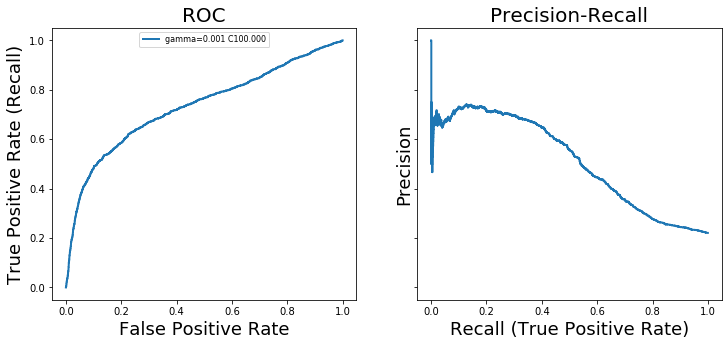

In [13]:
## Se escogen tres modelos con los mejores resultados: SVM,RF y KNN, se optimiza y se comparan valores de Presición y AUC.

from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.figure()

fig, axes = plt.subplots(1, 2, figsize=(12, 5),
                         sharex=True, sharey=True)
ax = axes[0]
bx = axes[1]


for gamma in [0.001]:
    for C in [100]:
        svc = SVC(gamma=gamma,C=C).fit(X_train, y_train)
        accuracy = svc.score(X_test, y_test)
        auc = roc_auc_score(y_test, svc.decision_function(X_test))
        fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
        precision_RF, recall_RF, _ = precision_recall_curve(y_test, svc.decision_function(X_test))
        print(" C= %.02f gamma = %.03f  accuracy = %.02f  AUC = %.02f" % ( C,gamma, accuracy, auc))
        ax.step(fpr, tpr, lw=2, where='post',label="gamma=%.03f C%.03f" % (gamma,C))
        bx.step(recall_RF, precision_RF,  lw=2, where='post',label="gamma=%.03f C%.03f" % (gamma,C))  

ax.set_title("ROC", fontsize=20)
ax.legend(loc='upper center', fontsize=8)
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=18)



bx.set_title("Precision-Recall", fontsize=20)
bx.set_xlabel('Recall (True Positive Rate)', fontsize=18)
bx.set_ylabel('Precision', fontsize=18)        
        
        
plt.show()

In [14]:
# Matriz de Confusión. SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predsvm = svc.predict(X_test)
aucsvm = roc_auc_score(y_test, svc.decision_function(X_test))
print("auc: %0.3f" % aucsvm)
print("accuracy: %0.3f" % accuracy_score(y_test, predsvm))
print("svc confusion matrix:")
print(confusion_matrix(y_test, predsvm))

print(classification_report(y_test, predsvm))

auc: 0.733
accuracy: 0.819
svc confusion matrix:
[[5585  261]
 [1094  560]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5846
           1       0.68      0.34      0.45      1654

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



 n_estimators = 50.00 max_depth=8.00 min_samples_split=2.00 min_samples_leaf=1.00 accuracy = 0.78  AUC = 0.78


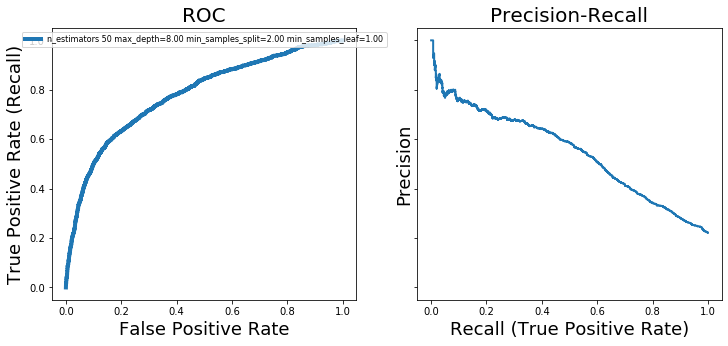

In [15]:
# Random Forest
fig, axes = plt.subplots(1, 2, figsize=(12, 5),
                         sharex=True, sharey=True)
ax = axes[0]
bx = axes[1]


for n_estimators in [50]:
     for max_depth in [8]:
        for min_samples_leaf in [1]:
            for min_samples_split in [2]:
                rfmx = RandomForestClassifier(class_weight='balanced',min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,n_estimators=n_estimators,max_features='auto',max_depth=max_depth).fit(X_train, y_train)
                accuracy = rfmx.score(X_test, y_test)
                auc = roc_auc_score(y_test, rfmx.predict_proba(X_test)[:,1])
                fpr, tpr, _ = roc_curve(y_test ,rfmx.predict_proba(X_test)[:,1])
                precision_RF, recall_RF, _ = precision_recall_curve(y_test, rfmx.predict_proba(X_test)[:,1])
                print(" n_estimators = %.02f max_depth=%.02f min_samples_split=%.02f min_samples_leaf=%.02f accuracy = %.02f  AUC = %.02f" % ( n_estimators,max_depth,min_samples_split,min_samples_leaf,accuracy, auc))
                ax.step(fpr, tpr, lw=4, where='post',label="n_estimators %.f max_depth=%.02f min_samples_split=%.02f min_samples_leaf=%.02f" % (n_estimators,max_depth,min_samples_split,min_samples_leaf))
                bx.step(recall_RF, precision_RF, lw=2, where='post',label="n_estimators %.f max_depth=%.02f min_samples_split=%.02f min_samples_leaf=%.02f" % (n_estimators,max_depth,min_samples_split,min_samples_leaf))  
                    
ax.set_title("ROC", fontsize=20)
ax.legend(loc='upper center', fontsize=8)
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=18)



bx.set_title("Precision-Recall", fontsize=20)
bx.set_xlabel('Recall (True Positive Rate)', fontsize=18)
bx.set_ylabel('Precision', fontsize=18)


plt.show()

In [16]:
# Matriz de Confusión. RF
predrfm = rfmx.predict(X_test)

aucrfm = roc_auc_score(y_test, rfmx.predict_proba(X_test)[:,1])

print("auc: %0.2f" % aucrfm)
print("rfm accuracy: %0.2f" % accuracy_score(y_test, predrfm))
print("frm confusion matrix:")
print(confusion_matrix(y_test, predrfm))
print(classification_report(y_test, predrfm))

auc: 0.78
rfm accuracy: 0.78
frm confusion matrix:
[[4833 1013]
 [ 645 1009]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5846
           1       0.50      0.61      0.55      1654

    accuracy                           0.78      7500
   macro avg       0.69      0.72      0.70      7500
weighted avg       0.80      0.78      0.79      7500



 n_neighbors = 100.00  p = 2 leaf_size= 7 accuracy = 0.80  AUC = 0.77


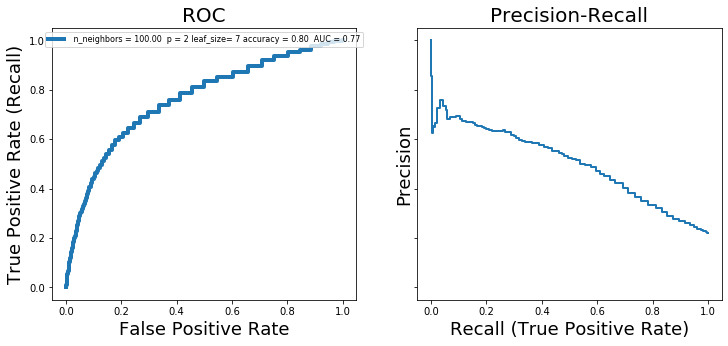

In [17]:
# KNN
fig, axes = plt.subplots(1, 2, figsize=(12, 5),
                         sharex=True, sharey=True)
ax = axes[0]
bx = axes[1]


for n_neighbors in [100]:
    for p in [2]:
        for leaf_size in [7]:
            knnx = KNeighborsClassifier(n_neighbors=n_neighbors,p=p,leaf_size=leaf_size).fit(X_train, y_train)
            accuracy = knnx.score(X_test, y_test)
            auc = roc_auc_score(y_test, knnx.predict_proba(X_test)[:,1])
            fpr, tpr, _ = roc_curve(y_test , knnx.predict_proba(X_test)[:,1])
            precision_knn, recall_knn, _ = precision_recall_curve(y_test, knnx.predict_proba(X_test)[:,1]) 
            ax.step(fpr, tpr, lw=4, where='post',label=" n_neighbors = %.02f  p = %.0f leaf_size= %.0f accuracy = %.02f  AUC = %.02f" % ( n_neighbors,p,leaf_size, accuracy, auc))
            bx.step(recall_knn, precision_knn, lw=2, where='post',label=" n_neighbors = %.02f  p = %.0f leaf_size= %.0f accuracy = %.02f  AUC = %.02f" % ( n_neighbors,p,leaf_size, accuracy, auc))  
            print(" n_neighbors = %.02f  p = %.0f leaf_size= %.0f accuracy = %.02f  AUC = %.02f" % ( n_neighbors,p,leaf_size, accuracy, auc))
          

        
ax.set_title("ROC", fontsize=20)
ax.legend(loc='upper center', fontsize=8)
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=18)

bx.set_title("Precision-Recall", fontsize=20)
bx.set_xlabel('Recall (True Positive Rate)', fontsize=18)
bx.set_ylabel('Precision', fontsize=18)
 
plt.show()

In [18]:
# Matriz de Confusión. KNN
predknnx = knnx.predict(X_test)
print("knn accuracy: %0.3f" % accuracy_score(y_test, predknnx))
print("knn confusion matrix:")
print(confusion_matrix(y_test, predknnx))
print(classification_report(y_test, predknnx))

knn accuracy: 0.804
knn confusion matrix:
[[5597  249]
 [1224  430]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5846
           1       0.63      0.26      0.37      1654

    accuracy                           0.80      7500
   macro avg       0.73      0.61      0.63      7500
weighted avg       0.78      0.80      0.77      7500



In [19]:
# Se seleccionas las mejores reglas.
from skrules import SkopeRules


feature_names = ['SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL_bins'
                , 'LIMIT_AGE_bins', 'BILL_ATM1_bins', 'BILL_ATM2_bins', 'BILL_ATM3_bins', 'BILL_ATM4_bins',
                'BILL_ATM5_bins', 'BILL_ATM6_bins','PAY_AMT1_bins','PAY_AMT2_bins','PAY_AMT3_bins','PAY_AMT4_bins'
                ,'PAY_AMT5_bins','PAY_AMT6_bins','EDUCATION_high school','EDUCATION_others','EDUCATION_university',
                'MARRIAGE_married','MARRIAGE_others','MARRIAGE_single']
target_names= ['non_default','default_payment_next_month']

clf = SkopeRules(max_depth_duplication=2,
                 max_depth=8,
                 n_estimators=50,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

for idx, species in enumerate(target_names):
    X, y = X_train, y_train
    clf.fit(X, y == idx)
    rules = clf.rules_[:4]
    print(str(len(clf.rules_)) + ' rules have been built.')
    print("Rules for default", species)
    for rule in rules:
        print(rule)
    print()
    print(20*'=')
    print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1 rules have been built.
Rules for default non_default
('PAY_0 <= 4.5 and PAY_AMT3_bins > 1.5 and PAY_2 <= 4.5 and PAY_3 <= 4.5 and PAY_5 <= 4.0 and PAY_6 <= 4.0 and LIMIT_BAL_bins > 1.5 and BILL_ATM1_bins > 1.5', (0.9161016949152543, 0.4639816868159382, 1))


5 rules have been built.
Rules for default default_payment_next_month
('PAY_0 > 4.5 and PAY_AMT2_bins <= 4.5 and PAY_2 <= 6.5 and EDUCATION_others <= 0.5 and PAY_3 > 2.5 and PAY_4 > 1.5 and PAY_5 <= 4.0 and LIMIT_BAL_bins <= 4.5', (0.6709511568123393, 0.13188479029813036, 1))
('PAY_0 <= 7.5 and PAY_0 > 4.5 and PAY_AMT1_bins <= 4.5 and PAY_AMT5_bins <= 3.5 and EDUCATION_others <= 0.5 and PAY_5 <= 4.0 and LIMIT_BAL_bins <= 4.5 and BILL_ATM1_bins > 1.5', (0.6825842696629213, 0.12146963259185203, 1))
('PAY_0 > 4.5 and EDUCATION_high school <= 0.5 and EDUCATION_others <= 0.5 and PAY_3 <= 5.5 and PAY_5 <= 4.0 and PAY_5 > 2.5 and PAY_6 > 2.5 and BILL_ATM1_bins > 1.5', (0.7258805513016845, 0.11975745325922182, 1))
('PAY_0 > 4.5 and PAY_A